In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [15]:
x = 6*np.random.rand(200,1)-3
y= 0.8*x**2+0.9*x+2+np.random.randn(200,1)

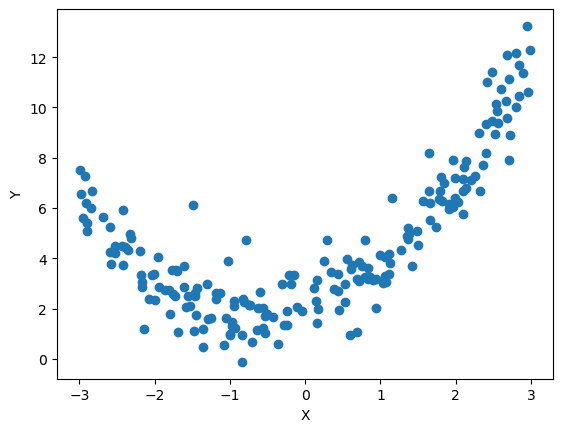

In [16]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.8, random_state=42)

In [18]:
#Apply Linear Regression
lr = LinearRegression()

In [19]:
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(x_test)

In [21]:
r2_score(y_test,y_pred)

0.3303833983474418

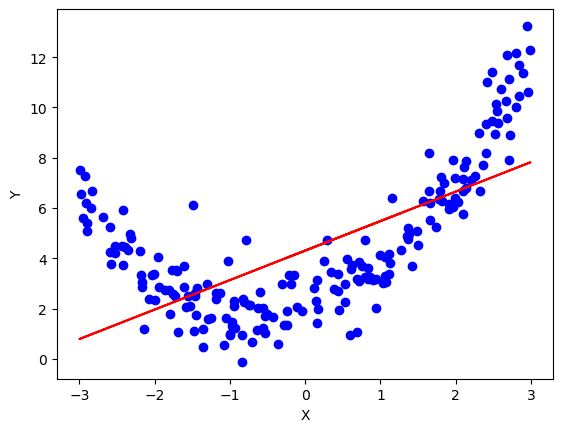

In [24]:
plt.plot(x_test,y_pred, color="r")
plt.scatter(x,y, color="blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [100]:
#Applying Polynomial Regression of degree 4

poly =PolynomialFeatures(degree=2) #We will use polynomial features on input column only (x in this case) not on output column (y in this case)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)


In [101]:
print(x_train[10])
print(x_train_trans[10])

[0.7611275]
[1.         0.7611275  0.57931507]


In [102]:
lr = LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [103]:
y_predicted = lr.predict(x_test_trans)

In [104]:
r2_score(y_test, y_predicted)

0.883674154042994

In [105]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.97596322 0.73187916]]
[2.12317477]


In [106]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

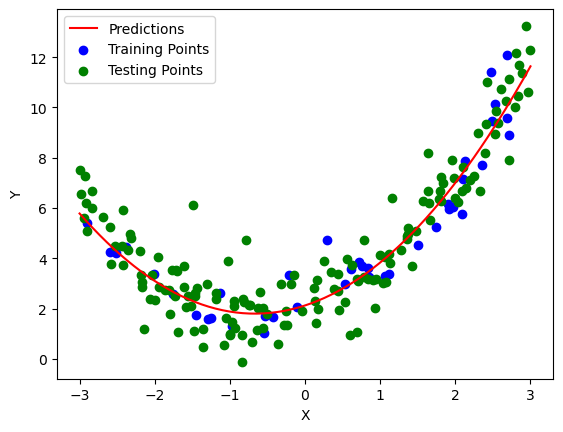

In [107]:
plt.plot(x_new,y_new,"red", label="Predictions")
plt.scatter(x_train,y_train,color="blue",label="Training Points")
plt.scatter(x_test,y_test,color="green",label="Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [113]:
# 3D Polynomial Regression
x=5*np.random.rand(200,1)-5.025
y=7*np.random.rand(200,1)-2.36

z= x**2+y**3+0.5*x+0.003*y+2*x*y+2.3+np.random.randn(200,1)

In [114]:
import plotly.express as px
df=px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y= y.ravel(), z=z.ravel())
fig.show()